In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [11]:
import matplotlib as mpl

print(mpl.matplotlib_fname())
print(mpl.get_cachedir())

C:\Users\User\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\User\.matplotlib


In [12]:
df = pd.read_csv('./data/악성임대인에 의한 보증사고 피해 임차인 연령 현황.csv', index_col='연령')

In [13]:
# df.set_index=df['연령']
display(df)

,사고 건수(A),사고 건수 비중,사고 금액(B),평균(B/A),HUG 대위변제 건수,HUG 대위변제 금액
연령,,,,,,
10대,1,0.0,4,4,1,4
20대,291,13.5,559,2,260,495
30대,1168,54.1,2318,2,1079,2117
40대,443,20.5,874,2,415,809
50대,161,7.5,342,2,149,307
60대,61,2.8,135,2,59,129
70대 이상,35,1.6,52,1,34,50
합계,2160,100.0,4284,2,1997,3911


In [14]:
df.drop('합계', inplace=True, axis=0)

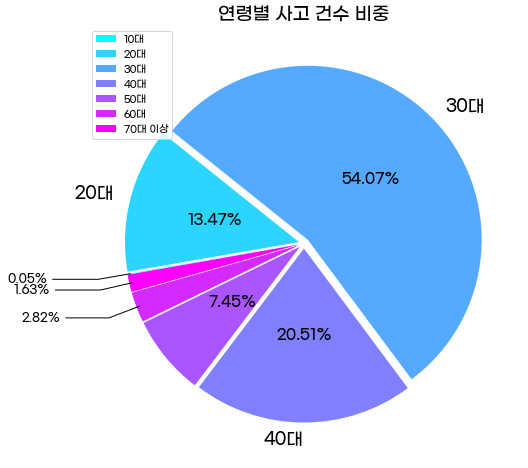

In [39]:
mycolormap = cm.get_cmap("cool", 7)
mycolor = [mycolormap(i) for i in range(7)]

fig = plt.figure(figsize=(11,8)) ## 캔버스 생성
fig.set_facecolor('white')
ax = fig.add_subplot()

df_per = df['사고 건수(A)']
wedgeprops={'edgecolor': 'w', 'linewidth': 5}
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']
labels2 = ['', '20대', '30대', '40대', '', '', '']

deposit = ax.pie(df_per,
                 colors=mycolor,
                 labels=labels2,
                 explode=explode,
                 startangle=190,
                 counterclock=False,
                 textprops = {'fontsize':17})
        
total=np.sum(df_per)

threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0)
 
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{df_per[i]/total*100:.2f}')
        text = f'{df_per[i]/total*100:.2f}%'
    else:
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if df_per[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment,
                    fontsize=12, **config,)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=15)

plt.title('연령별 사고 건수 비중',size=18)
plt.legend(deposit[0],labels,loc='upper left') ## 범례
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10368\4026985616.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df.index, fontsize=15)
C:\Users\User\AppData\Local\Temp\ipykernel_10368\4026985616.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,1400,200), fontsize=15)
No handles with labels found to put in legend.


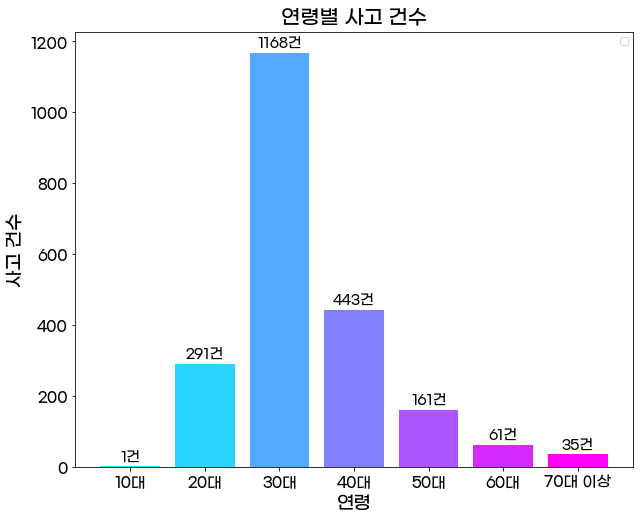

In [68]:
fig = plt.figure(figsize=(10,8)) ## 캔버스 생성
fig.set_facecolor('white')
ax = fig.add_subplot()

bar1 = ax.bar(df.index, df['사고 건수(A)'], color=mycolor)
bar1 = bar1[0]

ax.set_title('연령별 사고 건수',size=20, pad=10)


ax.set_xticklabels(labels=df.index, fontsize=15)
ax.set_yticklabels(np.arange(0,1400,200), fontsize=15)
ax.set_xlabel('연령', fontsize = 18)
ax.set_ylabel('사고 건수', fontsize = 18)

for x,y in enumerate(df['사고 건수(A)']):
    ax.text(x,y+15,f'{y}건',ha='center',fontsize=14)
               
ax.legend(loc='best')